In [51]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import models
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
model=models.Sequential()
model.add(Conv2D(32,(3,3),activation="relu",input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(keras.layers.Dropout(0.2))
model.add(Dense(256,activation="relu"))
model.add(keras.layers.Dropout(0.2))
model.add(Dense(128,activation="relu"))
model.add(Dense(15,activation="softmax"))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 99, 99, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 23, 23, 128)     

In [52]:
model.compile(optimizer=keras.optimizers.Adam(),loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=["accuracy"])

In [53]:
from keras.preprocessing.image import ImageDataGenerator
x_train_datagen=ImageDataGenerator(rescale=1./255,validation_split = .3)

In [54]:
train_datagen=x_train_datagen.flow_from_directory("/kaggle/input/plantdisease/PlantVillage/",
                                                  target_size=(200,200),batch_size=256,class_mode="sparse")

Found 20638 images belonging to 15 classes.


In [57]:
h=model.fit_generator(train_datagen,epochs=8)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/8
81/81 [==============================] - 70s 861ms/step - loss: 1.6920 - accuracy: 0.4391
Epoch 2/8
81/81 [==============================] - 70s 862ms/step - loss: 0.9917 - accuracy: 0.6641
Epoch 3/8
81/81 [==============================] - 70s 856ms/step - loss: 0.6911 - accuracy: 0.7628
Epoch 4/8
81/81 [==============================] - 70s 862ms/step - loss: 0.5068 - accuracy: 0.8247
Epoch 5/8
81/81 [==============================] - 71s 869ms/step - loss: 0.3855 - accuracy: 0.8654
Epoch 6/8
81/81 [==============================] - 70s 857ms/step - loss: 0.3250 - accuracy: 0.8867
Epoch 7/8
81/81 [==============================] - 70s 857ms/step - loss: 0.2320 - accuracy: 0.9211
Epoch 8/8
81/81 [==============================] - 70s 856ms/step - loss: 0.2237 - accuracy: 0.9235


# Model's Performance

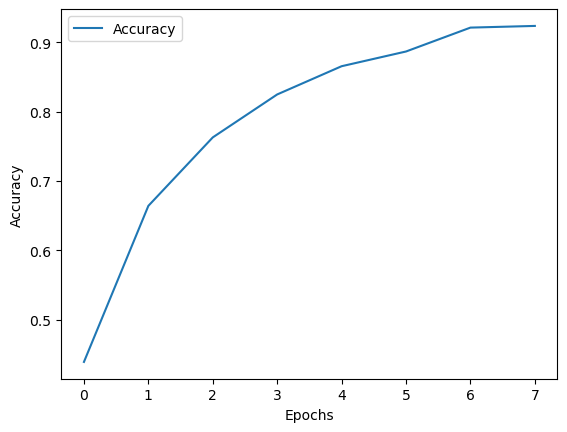

In [58]:
import matplotlib.pyplot as plt
acc=h.history["accuracy"]
plt.plot(acc,label="Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

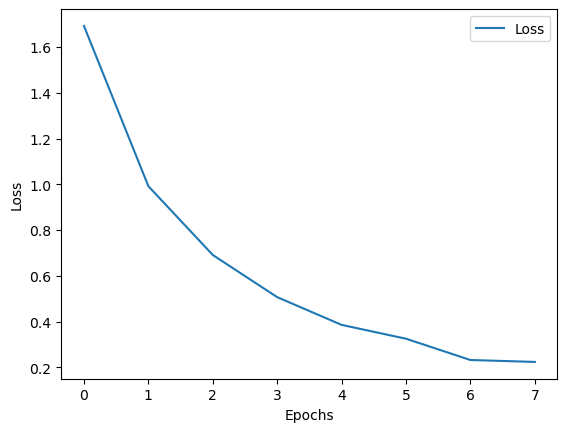

In [59]:
loss=h.history["loss"]
plt.plot(loss,label="Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [60]:
model.save("plant1.h5")

In [63]:
import cv2
from cv2 import imshow
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import models
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
model=models.Sequential()
model=tf.keras.models.load_model("/kaggle/working/plant1.h5")
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 99, 99, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 23, 23, 128)     

In [64]:
def rslt(a):
  if int(result[0][0]) == 1:
    print("\nDisease : Pepper : Bell Bacterial \n")
  elif int(result[0][1]) == 1:
    print("\nDisease : Pepper : Bell healthy  \n")
  elif int(result[0][2]) == 1:
    print("\nDisease : Potato : Early Blight \n")
  elif int(result[0][3]) == 1:
    print("\nDisease : Potato : Late Blight \n")
  elif int(result[0][4]) == 1:
    print("\nDisease : Potato : Healthy \n")
  elif int(result[0][5]) == 1:
    print("\nDisease : Tomato : Bacterial Spot\n")
  elif int(result[0][6]) == 1:
    print("\nDisease : Tomato : Early Blight \n")
  elif int(result[0][7]) == 1:
    print("\nDisease : Tomato : Late Blight \n")
  elif int(result[0][8]) == 1:
    print("\nDisease : Tomato : Leaf Mold \n")
  elif int(result[0][9]) == 1:
    print("\nDisease : Tomato : Septoria Leaf Spot\n")
  elif int(result[0][10]) == 1:
    print("\nDisease : Tomato : Spider Mites \n")
  elif int(result[0][11]) == 1:
    print("\nDisease : Tomato : Target Spots \n")
  elif int(result[0][12]) == 1:
    print("\nDisease : Tomato : Tomato Yellow leaf cCurl \n")
  elif int(result[0][13]) == 1:
    print("\nDisease : Tomato : Tomato Mosaic Virus\n")
  else :
    print("\nDisease : Tomato : Tomato Yellow leaf cCurl\n")

# Testing

1/1 [==============================] - 0s 98ms/step

Disease : Potato : Early Blight 



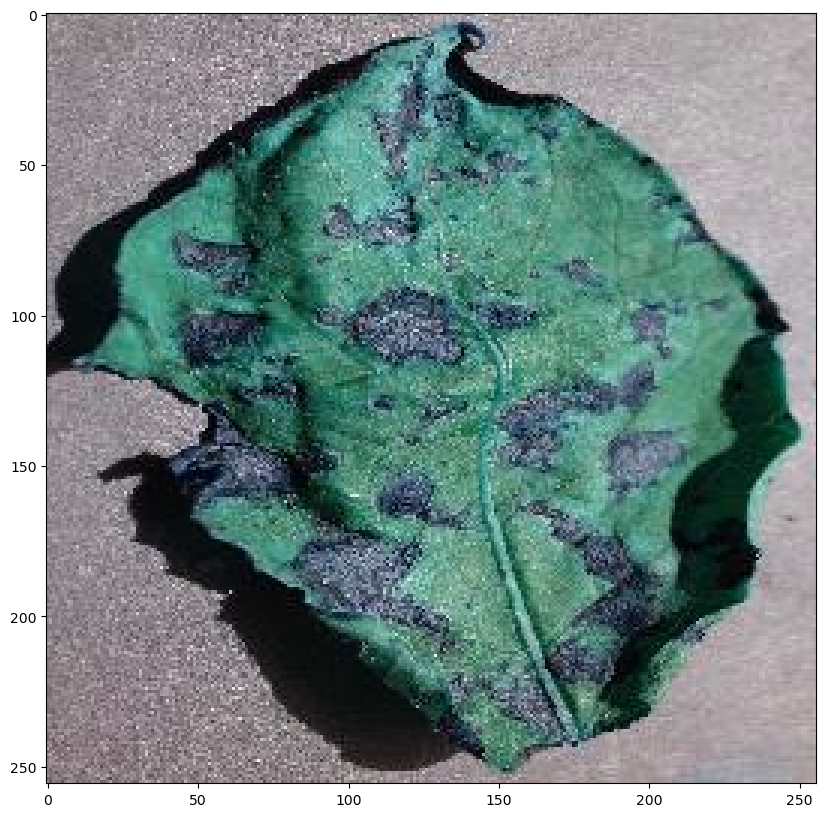

In [65]:
import numpy as np
from keras.utils import load_img, img_to_array
a="/kaggle/input/plantdisease/PlantVillage/Potato___Early_blight/001187a0-57ab-4329-baff-e7246a9edeb0___RS_Early.B 8178.JPG"
test_image = load_img(a, target_size=(200,200))
test_image =img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
x=[round(i) for i in result[0] ]
rslt([x])
b=cv2.imread(a)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.imshow(b)

1/1 [==============================] - 0s 23ms/step

Disease : Pepper : Bell healthy  



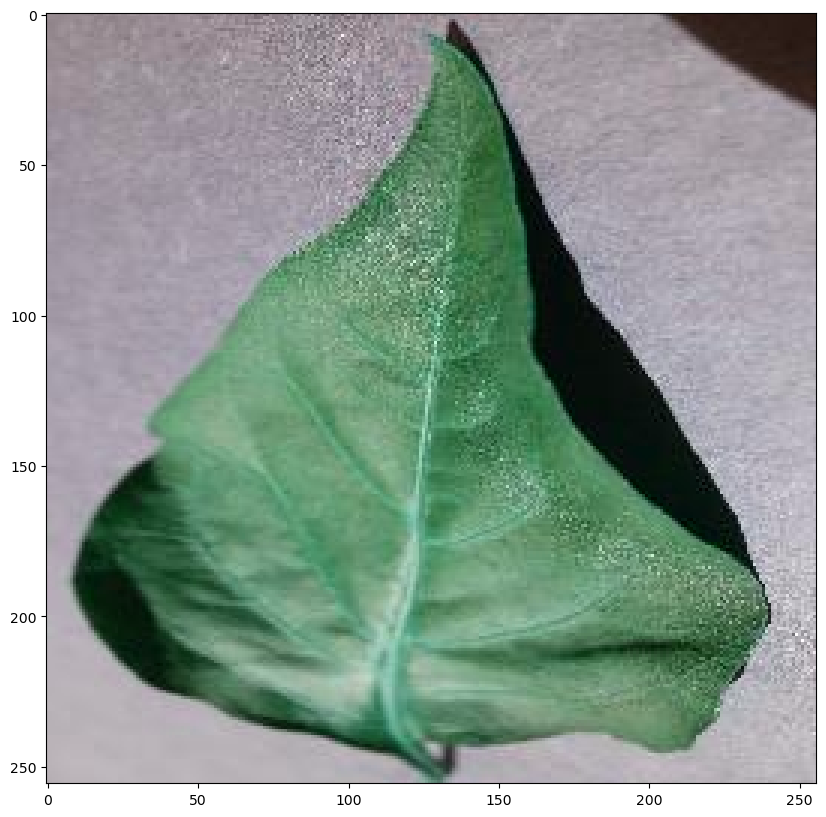

In [69]:
a="/kaggle/input/plantdisease/PlantVillage/Pepper__bell___healthy/00208a93-7687-4e8c-b79e-3138687e0f38___JR_HL 7955.JPG"
test_image = load_img(a, target_size=(200,200))
test_image =img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
x=[round(i) for i in result[0] ]
rslt([x])
b=cv2.imread(a)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.imshow(b)

In [79]:
print(model.metrics_names)

['loss', 'accuracy']


# Model's Testing Accuracy 

In [88]:
print("Testing Accuracy : ",model.evaluate_generator(train_datagen)[1]*100,"%")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


Testing Accuracy :  96.99098467826843 %


1/1 [==============================] - 0s 21ms/step

Disease : Potato : Early Blight 



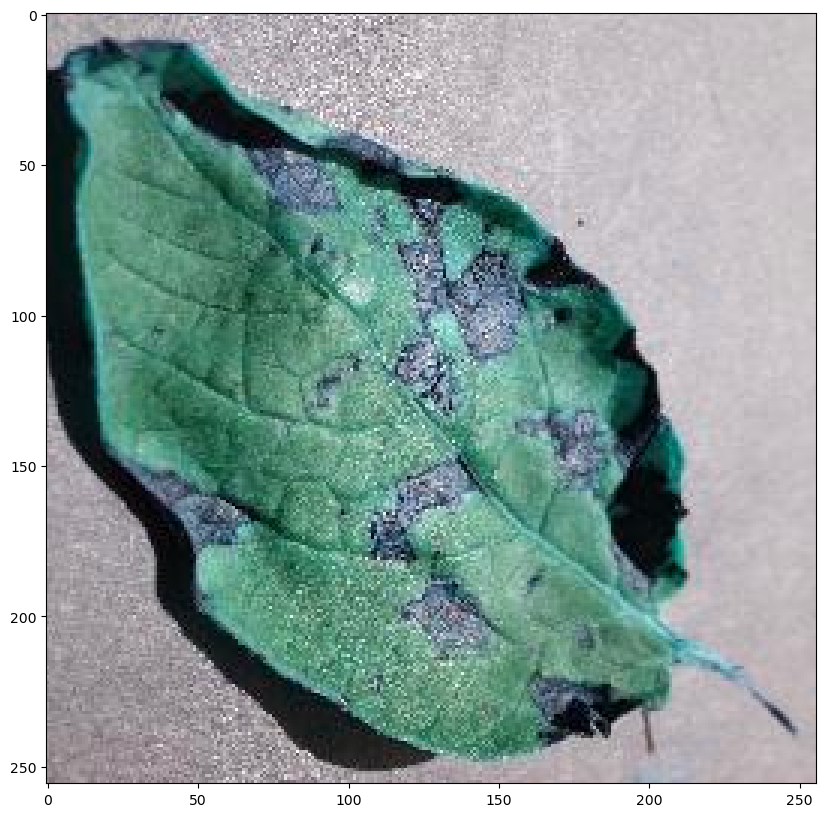

In [70]:
a="/kaggle/input/plantdisease/PlantVillage/Potato___Early_blight/002a55fb-7a3d-4a3a-aca8-ce2d5ebc6925___RS_Early.B 8170.JPG"
test_image = load_img(a, target_size=(200,200))
test_image =img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
x=[round(i) for i in result[0] ]
rslt([x])
b=cv2.imread(a)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.imshow(b)

1/1 [==============================] - 0s 22ms/step

Disease : Tomato : Tomato Mosaic Virus



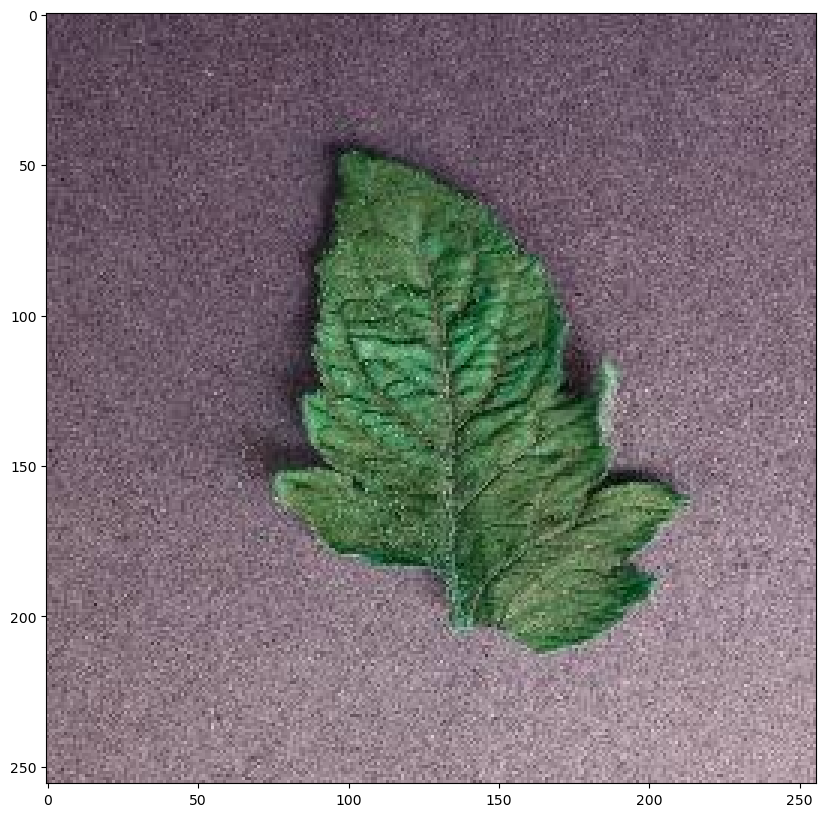

In [92]:
a="/kaggle/input/plantdisease/PlantVillage/Tomato__Tomato_mosaic_virus/0e56889c-7e80-49f3-8da3-3a437244e8fd___PSU_CG 2140.JPG"
test_image = load_img(a, target_size=(200,200))
test_image =img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
x=[round(i) for i in result[0] ]
rslt([x])
b=cv2.imread(a)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.imshow(b)